In [ ]:
import numpy as np
import pandas as pd
import os

%matplotlib inline

base_url = "datasets/thai-modified"

In [38]:
all_text = np.load('datasets/thai/all_samples.npy')
df = pd.DataFrame(all_text, columns=['text'])

In [39]:
df.head()

,text
0,"นาโนเซนเซอร์,""นาโน เซนเซอร์ นาโน เซนเซอร์ เป็น..."
1,เลือด และ จมูก อิเล็กทรอนิกส์ ที่ ใช้ ตรวจสอบ ...
2,รั่ว ไอ้ แมง ปอ แมน ฮีโร่ ซุปเปอร์ รั่ว เป็น ภ...
3,ซุ่มซ่าม ที่ บังเอิญ โดน แมลงปอ ใน ห้อง วิทยาศ...
4,"ทำให้ เกิด เรื่อง ฮา ๆ ขึ้น มา อีก เป็น ขบวน"" ..."


In [40]:
all_text[0:5]

array(['นาโนเซนเซอร์,"นาโน เซนเซอร์ นาโน เซนเซอร์ เป็น เทคโนโลยี ที่ ใช้ ใน การ ตรวจ วัด ได้ ใน หลากหลาย รูปแบบ เช่น ตรวจ ของ สะสม ใน ร่างกาย ตรวจ แอลกอฮอล์ ใน',
       'เลือด และ จมูก อิเล็กทรอนิกส์ ที่ ใช้ ตรวจสอบ กลิ่น ที่ มนุษย์ ไม่ อาจ รับ กลิ่น ได้" ไอ้แมงปอแมน ฮีโร่ซุปเปอร์รั่ว,"ไอ้ แมง ปอ แมน ฮีโร่ ซุปเปอร์',
       'รั่ว ไอ้ แมง ปอ แมน ฮีโร่ ซุปเปอร์ รั่ว เป็น ภาพยนตร์ แนว ตลก ล้อเลียน หนัง ดัง ๆ หลาย เรื่อง โดย เนื้อเรื่อง เล่า ถึง ริ ค หนุ่ม น้อยหน้า ละอ่อน จอม',
       'ซุ่มซ่าม ที่ บังเอิญ โดน แมลงปอ ใน ห้อง วิทยาศาสตร์ กัด จึง ทำให้ เขา มี พลัง เหนือ มนุษย์ เพื่อ คอย ปราบ เหล่า ร้าย แต่ เพราะ ความ ซุ่มซ่าม ของ เขา จึง',
       'ทำให้ เกิด เรื่อง ฮา ๆ ขึ้น มา อีก เป็น ขบวน" โบเลโร (ราแวล),"โบ เล โร ( รา แวล ) โบ เล โร เป็น ผล งาน ประพันธ์ สำหรับ บรรเลง ด้วย วง ออร์ เคส ตรา โดย มอ ริ ส รา'],
      dtype='<U782')

In [41]:
texts = all_text.tolist()
characters = pd.DataFrame(sorted(set(''.join(texts))), columns=['original'])
characters['mapped'] = 'u'

## Cleaning

In this iteration of the thai tokenizer, I'm going to drastically reduce the number of unique characters.

* Thai characters: remain in the set (obviously)
* Other language characters: will be marked as u for unknown - this will be the default mark for any character which isn't in the set
* Numbers 0-9: will be marked as n for number
* All punctuation marks: will be marked as p for punctuation

In [43]:
# thai characters
characters.iloc[153:239, 1] = characters.iloc[153:239, 0]
# numbers
characters.iloc[16:26, 1] = 'n'
#punctuation
characters.iloc[np.r_[1:16, 26:31, 57:63, 89:105], 1] = 'p'

In [44]:
#remove all 'u' entries
characters = characters[characters['mapped'] != 'u']
final_characters = characters.reset_index(drop=True)

In [45]:
char_to_symbol = dict(zip(characters['original'], characters['mapped']))

char_to_symbol[' '] = ' '

In [46]:
unique_characters = sorted({' ','u'}.union(final_characters['mapped'].values))

char_to_int = {v: i for i, v in enumerate(unique_characters)}
char_to_int

{' ': 0,
 'n': 1,
 'p': 2,
 'u': 3,
 'ก': 4,
 'ข': 5,
 'ฃ': 6,
 'ค': 7,
 'ฅ': 8,
 'ฆ': 9,
 'ง': 10,
 'จ': 11,
 'ฉ': 12,
 'ช': 13,
 'ซ': 14,
 'ฌ': 15,
 'ญ': 16,
 'ฎ': 17,
 'ฏ': 18,
 'ฐ': 19,
 'ฑ': 20,
 'ฒ': 21,
 'ณ': 22,
 'ด': 23,
 'ต': 24,
 'ถ': 25,
 'ท': 26,
 'ธ': 27,
 'น': 28,
 'บ': 29,
 'ป': 30,
 'ผ': 31,
 'ฝ': 32,
 'พ': 33,
 'ฟ': 34,
 'ภ': 35,
 'ม': 36,
 'ย': 37,
 'ร': 38,
 'ฤ': 39,
 'ล': 40,
 'ฦ': 41,
 'ว': 42,
 'ศ': 43,
 'ษ': 44,
 'ส': 45,
 'ห': 46,
 'ฬ': 47,
 'อ': 48,
 'ฮ': 49,
 'ฯ': 50,
 'ะ': 51,
 'ั': 52,
 'า': 53,
 'ำ': 54,
 'ิ': 55,
 'ี': 56,
 'ึ': 57,
 'ื': 58,
 'ุ': 59,
 'ู': 60,
 'ฺ': 61,
 '฿': 62,
 'เ': 63,
 'แ': 64,
 'โ': 65,
 'ใ': 66,
 'ไ': 67,
 'ๅ': 68,
 'ๆ': 69,
 '็': 70,
 '่': 71,
 '้': 72,
 '๊': 73,
 '๋': 74,
 '์': 75,
 'ํ': 76,
 '๎': 77,
 '๏': 78,
 '๐': 79,
 '๑': 80,
 '๒': 81,
 '๓': 82,
 '๔': 83,
 '๕': 84,
 '๖': 85,
 '๗': 86,
 '๘': 87,
 '๙': 88,
 '๚': 89}

The 90 unique characters in this version is a large improvement over the 261 in the previous one.

## Processing the samples

This will be a 3-step process.  First, all non-thai characters are mapped to their replacement values ('p', 'n', 'u').  Then, all spaces are removed.  Finally, each string is converted to an array of ints to feed into the model.

In [47]:
def map_characters_to_symbols(text_string, char_to_symbol=char_to_symbol):
    new_text = [char_to_symbol[c] if c in char_to_symbol
                    else 'u' for c in text_string]
    return ''.join(new_text)

In [48]:
text_with_symbols = [map_characters_to_symbols(s) for s in all_text]

In [49]:
text_with_symbols[100]

'ช่วง พ p ศ p nnn p nnnp p หรือ ราวๆ ช่วง ก่อน คริสต์ศักราช nnn ปี p ค p ศ p nnnp และ ล่มสลาย มา เป็น ยุค สาม ก๊ก p ราวๆ พ p ศ p nnn p nnnpp หรือๆ ค p ศ p nnn p nnnp มี'

In [50]:
text_with_spaces_removed = [''.join(text.split()) for text in text_with_symbols]

In [51]:
text_with_spaces_removed[100]

'ช่วงพpศpnnnpnnnppหรือราวๆช่วงก่อนคริสต์ศักราชnnnปีpคpศpnnnpและล่มสลายมาเป็นยุคสามก๊กpราวๆพpศpnnnpnnnppหรือๆคpศpnnnpnnnpมี'

In [52]:
def map_symbols_to_ints(symbol_string, symbol_map=char_to_int):
    int_array = [symbol_map[c] for c in symbol_string]
    return int_array

In [64]:
from keras.preprocessing.sequence import pad_sequences

final_samples = [map_symbols_to_ints(string) 
                     for string in text_with_spaces_removed]
final_samples = pad_sequences(final_samples, maxlen=128)

## Creating labels

Like last time, we'll convert any combination of 'space + character' to a 1 and everything else to a 0.

In [65]:
import re

def text_to_label(text):
    # match all spaces followed by non-whitespace
    add_ones = re.compile('\s+[^ ]')
    text_with_ones = add_ones.sub('1', text)
    label = [1 if c == '1' else 0 for c in text_with_ones]
    return label

In [103]:
final_labels = [text_to_label(string) for string in text_with_symbols]
final_labels = pad_sequences(final_labels, maxlen=128)
m = len(final_labels)
final_labels = np.reshape(final_labels, (m, 128, 1))

## Building the model

In [105]:
if not os.path.isfile(f'{base_url}/x_train.npy'):
    x_train = final_samples[:1000000,:]
    x_test = final_samples[1000000:,:]
    y_train = final_labels[:1000000,:]
    y_test = final_labels[1000000:,:]
    np.save(f'{base_url}/x_train.npy', x_train)
    np.save(f'{base_url}/x_test.npy', x_test)    
    np.save(f'{base_url}/y_train.npy', y_train)    
    np.save(f'{base_url}/y_test.npy', y_test)   
else:
    x_train = np.load(f'{base_url}/x_train.npy')
    x_test = np.load(f'{base_url}/x_test.npy')    
    y_train = np.load(f'{base_url}/y_train.npy')    
    y_test = np.load(f'{base_url}/y_test.npy')   

In [106]:
from keras.layers import Embedding, Input, LSTM, Dense, Bidirectional
from keras.models import Model

def build_model():
    inputs = Input((128,))
    outputs = Embedding(90, 32)(inputs)
    outputs = Bidirectional(LSTM(64, return_sequences=True))(outputs)
    outputs = Dense(1, activation='sigmoid')(outputs)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    
    return model
    

In [111]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 128)               0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 128, 32)           2880      
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 128, 128)          49664     
_________________________________________________________________
dense_10 (Dense)             (None, 128, 1)            129       
Total params: 52,673
Trainable params: 52,673
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.01)

Train on 990000 samples, validate on 10000 samples
Epoch 1/20
990000/990000 [==============================] - 1166s 1ms/step - loss: 0.1644 - acc: 0.9329 - val_loss: 0.0973 - val_acc: 0.9631
Epoch 2/20
990000/990000 [==============================] - 1155s 1ms/step - loss: 0.0845 - acc: 0.9683 - val_loss: 0.0767 - val_acc: 0.9715
Epoch 3/20
990000/990000 [==============================] - 1194s 1ms/step - loss: 0.0717 - acc: 0.9738 - val_loss: 0.0683 - val_acc: 0.9750
Epoch 4/20
990000/990000 [==============================] - 1193s 1ms/step - loss: 0.0652 - acc: 0.9765 - val_loss: 0.0635 - val_acc: 0.9771
Epoch 5/20
990000/990000 [==============================] - 1193s 1ms/step - loss: 0.0608 - acc: 0.9782 - val_loss: 0.0600 - val_acc: 0.9785
Epoch 6/20
990000/990000 [==============================] - 1193s 1ms/step - loss: 0.0578 - acc: 0.9793 - val_loss: 0.0574 - val_acc: 0.9794
Epoch 7/20
990000/990000 [==============================] - 1178s 1ms/step - loss: 0.0554 - acc: 0.9803

In [133]:
from keras.layers import Conv1D, MaxPooling1D, Permute, Reshape

def build_cnn_model():
    inputs = Input((128,))
    outputs = Reshape((128, 1))(inputs)
    outputs = Conv1D(16, 9, activation='relu')(outputs)
    outputs = MaxPooling1D()(outputs)
    outputs = Conv1D(16, 9, activation='relu')(outputs)
    outputs = MaxPooling1D()(outputs)
    outputs = Conv1D(16, 9, activation='relu')(outputs)
    outputs = MaxPooling1D()(outputs)
    outputs = Conv1D(128, 9, activation='sigmoid')(outputs)
    outputs = Permute((2,1))(outputs)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [134]:
cnn_model = build_cnn_model()
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 128)               0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 120, 16)           160       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 60, 16)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 52, 16)            2320      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 26, 16)            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 18, 16)            2320      
__________

In [135]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.01)

Train on 990000 samples, validate on 10000 samples
Epoch 1/20
990000/990000 [==============================] - 44s 44us/step - loss: 0.5380 - acc: 0.7617 - val_loss: 0.5314 - val_acc: 0.7634
Epoch 2/20
990000/990000 [==============================] - 38s 39us/step - loss: 0.5153 - acc: 0.7682 - val_loss: 0.5041 - val_acc: 0.7730
Epoch 3/20
990000/990000 [==============================] - 39s 39us/step - loss: 0.4938 - acc: 0.7793 - val_loss: 0.4884 - val_acc: 0.7821
Epoch 4/20
990000/990000 [==============================] - 39s 39us/step - loss: 0.4806 - acc: 0.7867 - val_loss: 0.4775 - val_acc: 0.7881
Epoch 5/20
990000/990000 [==============================] - 38s 39us/step - loss: 0.4719 - acc: 0.7914 - val_loss: 0.4708 - val_acc: 0.7915
Epoch 6/20
990000/990000 [==============================] - 39s 39us/step - loss: 0.4673 - acc: 0.7939 - val_loss: 0.4686 - val_acc: 0.7934
Epoch 7/20
990000/990000 [==============================] - 38s 39us/step - loss: 0.4642 - acc: 0.7956 - val_

In [144]:
from keras.layers import Flatten

def build_larger_cnn_model():
    inputs = Input((128,))
    outputs = Reshape((128, 1))(inputs)
    outputs = Conv1D(32, 9, activation='relu')(outputs)
    outputs = MaxPooling1D()(outputs)
    outputs = Conv1D(32, 9, activation='relu')(outputs)
    outputs = MaxPooling1D()(outputs)
    outputs = Conv1D(32, 9, activation='relu')(outputs)
    outputs = MaxPooling1D()(outputs)
    outputs = Conv1D(128, 9, activation='relu')(outputs)
    outputs = Flatten()(outputs)
    outputs = Dense(128, activation='sigmoid')(outputs)
    outputs = Reshape((128, 1))(outputs)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [145]:
larger_cnn = build_larger_cnn_model()
larger_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 128)               0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 128, 1)            0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 120, 32)           320       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 60, 32)            0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 52, 32)            9248      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 26, 32)            0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 18, 32)            9248      
__________

In [146]:
larger_cnn_history = larger_cnn.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.01)

Train on 990000 samples, validate on 10000 samples
Epoch 1/10
990000/990000 [==============================] - 64s 64us/step - loss: 0.5320 - acc: 0.7623 - val_loss: 0.5109 - val_acc: 0.7686
Epoch 2/10
990000/990000 [==============================] - 57s 57us/step - loss: 0.4945 - acc: 0.7770 - val_loss: 0.4834 - val_acc: 0.7825
Epoch 3/10
990000/990000 [==============================] - 57s 58us/step - loss: 0.4687 - acc: 0.7910 - val_loss: 0.4591 - val_acc: 0.7965
Epoch 4/10
990000/990000 [==============================] - 57s 58us/step - loss: 0.4505 - acc: 0.8008 - val_loss: 0.4459 - val_acc: 0.8027
Epoch 5/10
990000/990000 [==============================] - 57s 58us/step - loss: 0.4386 - acc: 0.8064 - val_loss: 0.4351 - val_acc: 0.8079
Epoch 6/10
990000/990000 [==============================] - 57s 58us/step - loss: 0.4290 - acc: 0.8109 - val_loss: 0.4263 - val_acc: 0.8121
Epoch 7/10
990000/990000 [==============================] - 57s 57us/step - loss: 0.4213 - acc: 0.8145 - val_

In [147]:
rnn_predictions = model.predict(x_test)
cnn_predictions = cnn_model.predict(x_test)
larger_cnn_predictions = larger_cnn.predict(x_test)

In [221]:
rounded_rnn = np.round(rnn_predictions)
rounded_cnn = np.round(cnn_predictions)
rounded_lcnn = np.round(larger_cnn_predictions)

In [226]:
def precision_recall_f1(predictions, labels, pos_label=1):
    indices = predictions == pos_label
    total_pred_pos = np.sum(predictions[indices])
    true_positives = np.sum(labels[indices])
    total_real_pos = np.sum(labels)
    
    precision = true_positives/total_pred_pos
    recall = true_positives/total_real_pos
    f1 = 2 * precision * recall / (precision + recall)
    
    return precision, recall, f1

In [227]:
rnn_metrics = precision_recall_f1(rounded_rnn, y_test)

In [228]:
rnn_metrics

(0.9718237453232462, 0.95978050863672, 0.9657645831742087)

In [229]:
cnn_metrics = precision_recall_f1(rounded_cnn, y_test)
cnn_metrics

(0.6997733034830442, 0.3352147831534876, 0.4532889976463012)

In [230]:
lcnn_metrics = precision_recall_f1(rounded_lcnn, y_test)
lcnn_metrics

(0.7182312070595263, 0.4078187545565842, 0.5202400716328881)

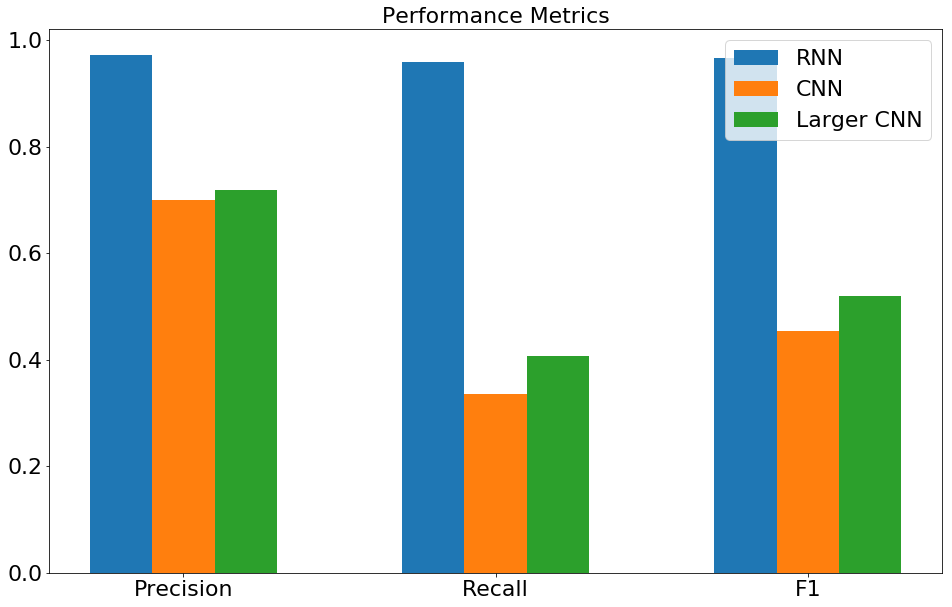

In [254]:
import matplotlib.pyplot as plt

x = np.arange(3)
y = np.arange(6) / 5

plt.figure(figsize=(16,10))
p1 = plt.bar(x, rnn_metrics, 0.2)
p2 = plt.bar(x + 0.2, cnn_metrics, 0.2)
p3 = plt.bar(x + 0.4, lcnn_metrics, 0.2)

plt.title('Performance Metrics', fontsize=22)
plt.xticks(x + 0.2, ('Precision', 'Recall', 'F1'), fontsize=22)
plt.yticks(y, fontsize=22)
plt.legend((p1[0], p2[0], p3[0]), ('RNN', 'CNN', 'Larger CNN'), fontsize=22)
plt.show()

## Results

The rnn significantly outperformed the Conv1D models in all performance metrics, although training took 10 times longer.